In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [2]:
outcomes = pd.read_csv('data/london-outcomes.csv')

In [3]:
police = pd.read_csv('data/london-stop-and-search.csv')

C:\Users\Toluwalase\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
street = pd.read_csv('data/london-street.csv')

In [5]:
crime = pd.read_csv('data/london_crime_by_lsoa.csv')

In [6]:
police.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [67]:
police['Type'].value_counts(dropna=False)

Person search                226691
Person and Vehicle search     72290
Vehicle search                 3642
Name: Type, dtype: int64

In [68]:
police['Object of search'].value_counts(dropna=False)

Controlled drugs                       134843
NaN                                     86467
Articles for use in criminal damage     77222
Firearms                                 2136
Stolen goods                              968
Anything to threaten or harm anyone       588
Article for use in theft                  287
Offensive weapons                         107
Evidence of offences under the Act          3
Fireworks                                   2
Name: Object of search, dtype: int64

In [6]:
police.dropna(subset=['Object of search'], how='all', inplace = True)

In [7]:
police['Object of search'].value_counts(dropna=False)

Controlled drugs                       134843
Articles for use in criminal damage     77222
Firearms                                 2136
Stolen goods                              968
Anything to threaten or harm anyone       588
Article for use in theft                  287
Offensive weapons                         107
Evidence of offences under the Act          3
Fireworks                                   2
Name: Object of search, dtype: int64

In [79]:
ps['Date'].unique()

array(['2015-03-02T16:40:00+00:00', '2015-03-02T19:15:00+00:00',
       '2015-03-03T15:50:00+00:00', ..., '2017-04-30T22:25:00+00:00',
       '2017-04-30T22:35:00+00:00', '2017-04-30T22:40:00+00:00'],
      dtype=object)

In [76]:
ps= police[['Date','Type', 'Object of search']]
ps.head()

,Date,Type,Object of search
0,2015-03-02T16:40:00+00:00,Person search,Stolen goods
1,2015-03-02T16:40:00+00:00,Person search,Stolen goods
3,2015-03-02T19:15:00+00:00,Person search,Stolen goods
4,2015-03-03T15:50:00+00:00,Person and Vehicle search,Stolen goods
5,2015-03-03T20:20:00+00:00,Person search,Controlled drugs


In [78]:
isSearch = ps['Type'] == 'Person search'
searchType = ps[isSearch]
searchType.head()

,Date,Type,Object of search
0,2015-03-02T16:40:00+00:00,Person search,Stolen goods
1,2015-03-02T16:40:00+00:00,Person search,Stolen goods
3,2015-03-02T19:15:00+00:00,Person search,Stolen goods
5,2015-03-03T20:20:00+00:00,Person search,Controlled drugs
7,2015-03-04T15:50:00+00:00,Person search,Article for use in theft


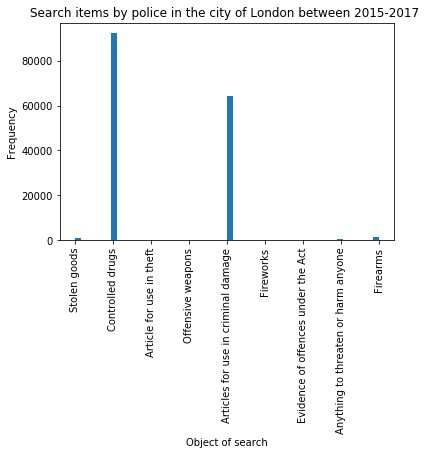

In [80]:
x = searchType['Object of search'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Object of search")
plt.title("Person search items by police in the city of London between 2015-2017 ")
plt.xticks(rotation='vertical')
plt.show()

In [81]:
isSearchPV = ps['Type'] == 'Person and Vehicle search'
searchTypePV = ps[isSearchPV]
searchTypePV.head()

,Date,Type,Object of search
4,2015-03-03T15:50:00+00:00,Person and Vehicle search,Stolen goods
6,2015-03-03T20:28:00+00:00,Person and Vehicle search,Controlled drugs
11,2015-03-05T13:35:00+00:00,Person and Vehicle search,Controlled drugs
12,2015-03-05T15:00:00+00:00,Person and Vehicle search,Controlled drugs
14,2015-03-06T15:30:00+00:00,Person and Vehicle search,Stolen goods


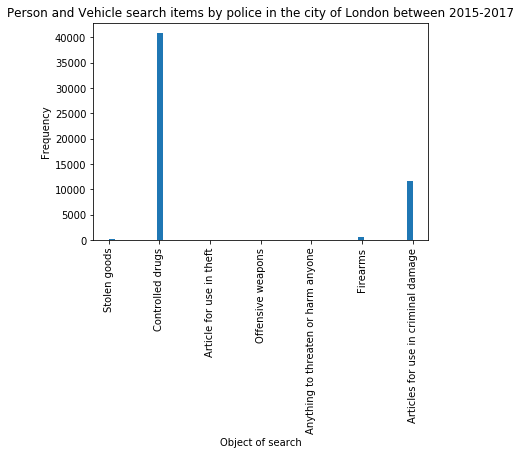

In [82]:
x = searchTypePV['Object of search'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Object of search")
plt.title("Person and Vehicle search items by police in the city of London between 2015-2017")
plt.xticks(rotation='vertical')
plt.show()

In [83]:
isSearchV = ps['Type'] == 'Vehicle search'
searchTypeV = ps[isSearchV]
searchTypeV.head()

,Date,Type,Object of search
2668,2017-01-27T00:30:00+00:00,Vehicle search,Anything to threaten or harm anyone
2683,2017-02-03T17:17:00+00:00,Vehicle search,Stolen goods
2860,2017-03-24T09:47:00+00:00,Vehicle search,Anything to threaten or harm anyone
89347,2015-11-01T00:02:00+00:00,Vehicle search,Articles for use in criminal damage
89611,2015-11-01T22:40:00+00:00,Vehicle search,Articles for use in criminal damage


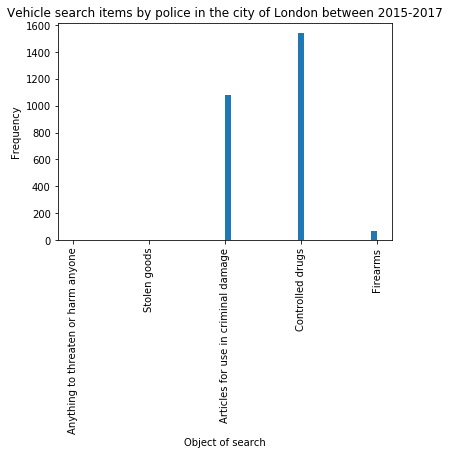

In [84]:
x = searchTypeV['Object of search'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Object of search")
plt.title("Vehicle search items by police in the city of London between 2015-2017")
plt.xticks(rotation='vertical')
plt.show()

In [69]:
police['Outcome'].value_counts(dropna=False)

Nothing found - no further action               207963
Suspect arrested                                 59130
Offender given drugs possession warning          25518
Offender given penalty notice                     5441
Local resolution                                  2285
Suspect summonsed to court                        1889
Offender cautioned                                 340
Article found - Detailed outcome unavailable        57
Name: Outcome, dtype: int64

In [70]:
police['Outcome linked to object of search'].value_counts(dropna=False)

NaN      301417
True        911
False       295
Name: Outcome linked to object of search, dtype: int64

In [7]:
outcomes.head()
outcomes.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
1947045,5186054ab0668f142d7cb79aec8376626c352d9c8db932...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.242173,51.446627,On or near IBSLEY GARDENS,E01004570,Wandsworth 023B,Suspect charged
1947046,34f05f2da82bb45753654fba55266fee64ed6deac58168...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.156772,51.442455,On or near HUNTER CLOSE,E01004545,Wandsworth 027B,Suspect charged
1947047,d53d0b9f8c8f4a75ef153a89d9b5e54a9a26ab99e82f8b...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.150844,51.474510,On or near RAWSON STREET,E01004563,Wandsworth 002C,Suspect charged
1947048,23cac61d3b0500a733a220664555305f337ac90a053993...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.174952,51.467217,On or near LAVENDER ROAD,E01004535,Wandsworth 007A,Investigation complete; no suspect identified
1947049,95b8f2a05ba8577a632ea3fb9a58b37eb3ea985678b215...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.191829,51.447830,On or near LYDDEN GROVE,E01004493,Wandsworth 019A,Investigation complete; no suspect identified


In [8]:
street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,NaN
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
3,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
4,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


In [8]:
outcomes.drop(['Crime ID', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name'], axis=1, inplace=True)

In [29]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947050 entries, 0 to 1947049
Data columns (total 5 columns):
Month           object
Reported by     object
Falls within    object
Location        object
Outcome type    object
dtypes: object(5)
memory usage: 74.3+ MB


In [9]:
police.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [13]:
police.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Gender', 'Age range', 'Self-defined ethnicity',
       'Officer-defined ethnicity', 'Legislation', 'Object of search',
       'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [10]:
street.drop(['Crime ID', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name', 'Context'], axis=1, inplace=True)
street.columns

Index(['Month', 'Reported by', 'Falls within', 'Location', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [30]:
street['Month'].unique()

array(['2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
       '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
       '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05'],
      dtype=object)

In [33]:
street['Month'].value_counts(dropna=False)

2016-07    94148
2017-05    91528
2016-08    90636
2017-03    89820
2016-10    88518
2014-07    88429
2016-05    87373
2015-07    87267
2016-06    86261
2016-09    85545
2015-10    84966
2014-10    84067
2015-06    84047
2017-04    83003
2014-06    82920
2016-12    82763
2016-11    82179
2015-11    82169
2015-08    81843
2014-09    81124
2015-05    80902
2014-08    80283
2014-11    80016
2017-01    79099
2015-03    78858
2015-12    78520
2016-04    77651
2015-09    77443
2016-03    77349
2017-02    76125
2015-04    75654
2016-01    75107
2014-12    74500
2016-02    73585
2015-01    73469
2015-02    69312
Name: Month, dtype: int64

In [34]:
street['Location'].value_counts(dropna=False)

On or near Supermarket                            114770
On or near Parking Area                            73814
On or near Shopping Area                           71489
On or near Petrol Station                          66311
On or near Nightclub                               39125
No Location                                        34678
On or near Sports/Recreation Area                  33053
On or near Pedestrian Subway                       26997
On or near Further/Higher Educational Building     23630
On or near Theatre/Concert Hall                    19736
On or near Police Station                          19583
On or near Hospital                                16615
On or near Conference/Exhibition Centre             9054
On or near High Street                              8948
On or near Bus/Coach Station                        6667
On or near Meridian Square                          6106
On or near Park/Open Space                          5435
On or near High Road           

In [31]:
street['Location'].unique()

array(['On or near Stone Buildings', 'On or near Pedestrian Subway',
       'On or near Carthusian Street', ..., 'On or near Sorrel Lane',
       'On or near Pilmer Court', 'On or near Foxes Walk'], dtype=object)

In [35]:
street['Last outcome category'].value_counts(dropna=False)

Investigation complete; no suspect identified          1084406
NaN                                                     708264
Status update unavailable                               625938
Under investigation                                     166240
Offender given a caution                                 63439
Court result unavailable                                 49821
Offender given a drugs possession warning                39297
Defendant found not guilty                               28398
Awaiting court outcome                                   27954
Offender sent to prison                                  27832
Offender given community sentence                        23629
Local resolution                                         20771
Offender fined                                           19857
Offender given penalty notice                            18884
Offender given suspended prison sentence                 13368
Offender given conditional discharge                   

In [25]:
street['Crime type'].value_counts(dropna=False)

Anti-social behaviour           708264
Violence and sexual offences    596107
Other theft                     333817
Vehicle crime                   262309
Burglary                        213125
Criminal damage and arson       184772
Shoplifting                     135780
Public order                    130653
Theft from the person           109168
Drugs                           106836
Robbery                          68920
Bicycle theft                    54649
Other crime                      29208
Possession of weapons            12871
Name: Crime type, dtype: int64

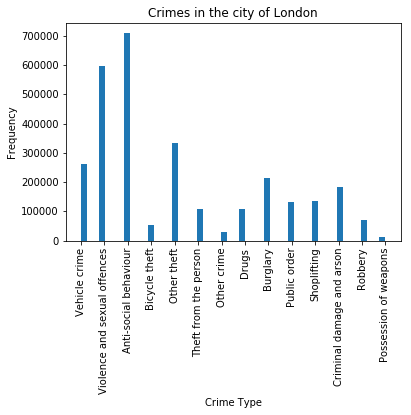

In [15]:
x = street['Crime type'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crime Type")
plt.title("Crimes in the city of London")
plt.xticks(rotation='vertical')
plt.show()

In [12]:
street['Month'].value_counts(dropna=False)

2016-07    94148
2017-05    91528
2016-08    90636
2017-03    89820
2016-10    88518
2014-07    88429
2016-05    87373
2015-07    87267
2016-06    86261
2016-09    85545
2015-10    84966
2014-10    84067
2015-06    84047
2017-04    83003
2014-06    82920
2016-12    82763
2016-11    82179
2015-11    82169
2015-08    81843
2014-09    81124
2015-05    80902
2014-08    80283
2014-11    80016
2017-01    79099
2015-03    78858
2015-12    78520
2016-04    77651
2015-09    77443
2016-03    77349
2017-02    76125
2015-04    75654
2016-01    75107
2014-12    74500
2016-02    73585
2015-01    73469
2015-02    69312
Name: Month, dtype: int64

In [14]:
policePresent = street[street['Location'] == 'On or near Police Station']
policePresent.head()

,Month,Reported by,Falls within,Location,Crime type,Last outcome category
97,2014-06,City of London Police,City of London Police,On or near Police Station,Anti-social behaviour,NaN
104,2014-06,City of London Police,City of London Police,On or near Police Station,Anti-social behaviour,NaN
105,2014-06,City of London Police,City of London Police,On or near Police Station,Anti-social behaviour,NaN
113,2014-06,City of London Police,City of London Police,On or near Police Station,Anti-social behaviour,NaN
161,2014-06,City of London Police,City of London Police,On or near Police Station,Drugs,Offender given a drugs possession warning


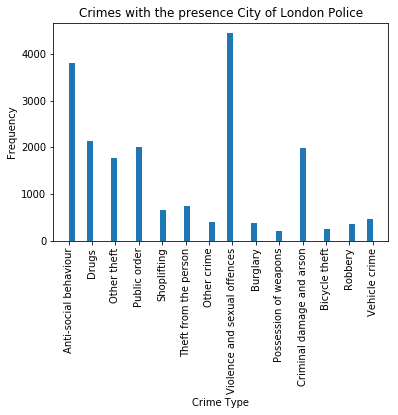

In [16]:
x = policePresent['Crime type'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crime Type")
plt.title("Crimes with the presence City of London Police")
plt.xticks(rotation='vertical')
plt.show()